# Iris clustering  using Unsupervised ML


## Aim of the project: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
#Importing The Required Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv("Iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.drop('Id',axis=1,inplace=True)

In [6]:
df.head(5) #here we need to remove the id as it is unwanted data.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Now we should understand the data by the pairplot from seaborn library 

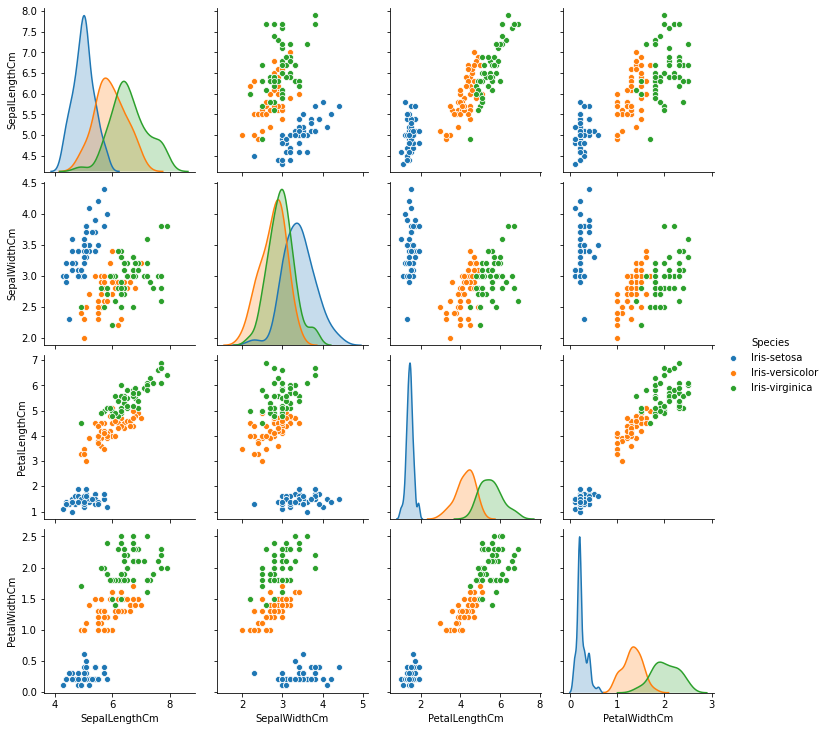

In [8]:
sns.pairplot(df,hue='Species')

#### WE CAN OBSERVE THAT IRISH-SEROSA MAKE A DISTINCT CLUSTER IN EVERY PARAMETER AND OTHER SPECIES ARE OVERLAPPING
### WE FIND THE OPTIMUM NUMBER OF CLUSTERS USING ELBOW METHOD

In [9]:
from sklearn.cluster import KMeans

x = df.iloc[:, [0, 1, 2, 3]].values

In [10]:
sum_of_squared_distance = []
K = range(1,10)
optimalK = 1
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(x)
  sum_of_squared_distance.append(km.inertia_)
  if k > 1:
    ratio = sum_of_squared_distance[k-1]/sum_of_squared_distance[k-2]
    if ratio < 0.55:
      optimalK = k

print("Optimal Number of Clusters =",optimalK)

Optimal Number of Clusters = 3


### Now the Elbow Graph will be plotted to visually represent the optimal number of clusters.

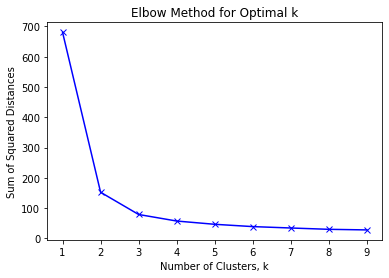

In [11]:
# Plotting Elbow Graph
plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

 The above plot is called the Elbow Method because the optimum clusters is where the elbow occurs. Thus this is the point when the within cluster sum of squares does not decrease significantly with every iteration.
Therefore, we choose the number of clusters for this data set to be 3

In [12]:
# Applying kmeans to the dataset/creating the kmeans classifier

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

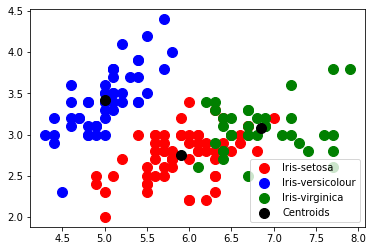

In [18]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
plt.legend()

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'black' )
plt.legend()

The Scatter Plot shows clearly the 3 clusters, represented by RED for Setosa, BLUE for Versicolor and GREEN for Virginica. The Centroids of each cluster are represented by BLACK .

## Final Conclusion:
### The Iris data set was found to be divided into 3 clusters by not only using the k-means algorithm but also visually.